### Student Information
Name: 黃暐喬 Huang Wei Chiao

Student ID:  0756527 (NCTU)

GitHub ID:   weichiao-cs07

---

### Instructions

- First, you should attempt the **take home** exercises provided in the [notebook](https://github.com/omarsar/data_mining_lab/blob/master/news_data_mining.ipynb) we used for the first lab session. Attempt all the exercises, as it is counts towards the final grade of your first assignment (20%). 

- Then, download the dataset provided in this [link](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The sentiment dataset contains a `sentence` and `score` label. Read the specificiations of the dataset before you start exploring it. 


- Then, you are asked to apply each of the data exploration and data operation steps learned in the [first lab session](https://github.com/omarsar/data_mining_lab) on **the new dataset**. You don't need to explain all the procedures as we did in the notebook, but you are expected to provide some **minimal comments** explaining your code. You are also expected to use the same libraries used in the first lab session. You are allowed to use and modify the `helper` functions we provided in the first lab session or create your own. Also, be aware that the helper functions may need modification as you are dealing with a completely different dataset. This part is worth 30% of your grade!

- In addition to applying the same operations from the first lab, we are asking that you attempt the following tasks on the new sentiment dataset as well (40%):
    - Use your creativity and imagination to generate **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) on how you may go about doing this. Keep in mind that you are generating a matrix similar to the term-document matrix we implemented in our first lab session. However, the weights will be computed differently and should represent the TF-IDF value of each word per document as opposed to the word frequency.
    - Using both the TF-IDF and word frequency features, try to compute the **similarity** between random sentences and report results. Read the "distance simiilarity" section of the Data Mining textbook on what measures you can use here. [Cosine similarity](https://jamesmccaffrey.wordpress.com/2017/03/29/the-cosine-similarity-of-two-sentences/) is one of these methods but there are others. Try to explore a few of them in this exercise and report the differences in result. 
    - Lastly, implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Try to implement this using scikit-learn built in classifiers and use both the TF-IDF features and word frequency features to build two seperate classifiers. Refer to this [nice article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/) on how to build this type of classifier using scikit-learn. Report the classification accuracy of both your models. If you are struggling with this step please reach us on Slack as soon as possible.   


- Presentation matters! You are also expected to **tidy up your notebook** and attempt new data operations and techniques that you have learned so far in the Data Mining course. Surprise us! This segment is worth 10% of your grade. The idea of this exercise is to begin thinking of how you will program the concepts you have learned and the process that is involved. 


- After completing all the above tasks, you are free to remove this header block and **submit** your assignment following the guide provided in the [README.md](https://github.com/omarsar/dm_2018_hw_1/blob/master/README.md) file of the assignment's repository. 

In [91]:
### Begin Assignment Here!
# import library
import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import plotly.plotly as py
import plotly.graph_objs as go
import math
import os
import helpers.data_mining_helpers as dmh
%matplotlib inline


## 1. Loading Data and Converting into Pandas Dataframe  
__---from sentiment_labelled_sentences from UCI ML dataset__

In [92]:
#dir = "/Users/ericahuang/Desktop/git/Github/dm_2018_hw_1"
# prepare dataset
here = os.path.dirname(__file__) if "__file__" in locals() else "."

files = [("amazon", os.path.join(here, "./data/sentiment_labelled_sentences/amazon_cells_labelled.txt")),
         ("imdb", os.path.join(here, "./data/sentiment_labelled_sentences/imdb_labelled.txt")),
         ("yelp", os.path.join(here, "./data/sentiment_labelled_sentences/yelp_labelled.txt"))]
dfs = []             

for provider, name in files:
    df = pd.read_csv(name, sep="\t")
    df.columns = ["sentence", "label"]
    df["provider"] = provider
    dfs.append(df)

senti_label = pd.concat(dfs, axis=0)
senti_label


,sentence,label,provider
0,"Good case, Excellent value.",1,amazon
1,Great for the jawbone.,1,amazon
2,Tied to charger for conversations lasting more...,0,amazon
3,The mic is great.,1,amazon
4,I have to jiggle the plug to get it to line up...,0,amazon
5,If you have several dozen or several hundred c...,0,amazon
6,If you are Razr owner...you must have this!,1,amazon
7,"Needless to say, I wasted my money.",0,amazon
8,What a waste of money and time!.,0,amazon
9,And the sound quality is great.,1,amazon


In [93]:
#size of the dataframe
print(senti_label.shape)
#what is the type of this data
print (type(senti_label))
print(senti_label[-5:])

(2745, 3)
<class 'pandas.core.frame.DataFrame'>
                                              sentence  label provider
994  I think food should have flavor and texture an...      0     yelp
995                           Appetite instantly gone.      0     yelp
996  Overall I was not impressed and would not go b...      0     yelp
997  The whole experience was underwhelming, and I ...      0     yelp
998  Then, as if I hadn't wasted enough of my life ...      0     yelp


## 2. Query 
__using __iloc__、__loc__ built-in function__


In [94]:
senti_label.provider[:2]

0    amazon
1    amazon
Name: provider, dtype: object

In [95]:
senti_label.sentence[0:2]

0    Good case, Excellent value.
1         Great for the jawbone.
Name: sentence, dtype: object

In [96]:
senti_label[0:100:10]

,sentence,label,provider
0,"Good case, Excellent value.",1,amazon
10,He was very impressed when going from the orig...,1,amazon
20,I bought this to use with my Kindle Fire and a...,1,amazon
30,This product is ideal for people like me whose...,1,amazon
40,I was not impressed by this product.,0,amazon
50,good protection and does not make phone too bu...,1,amazon
60,I really recommend this faceplates since it lo...,1,amazon
70,"Even in my BMW 3 series which is fairly quiet,...",0,amazon
80,Not a good bargain.,0,amazon
90,Made very sturdy.,1,amazon


In [97]:
# using iloc
# from record #10to the end , show every 5record and only show 15records int total
# and show 0 1 column
senti_label.iloc[10::5,:2][0:15]

,sentence,label
10,He was very impressed when going from the orig...,1
15,I advise EVERYONE DO NOT BE FOOLED!,0
20,I bought this to use with my Kindle Fire and a...,1
25,I've owned this phone for 7 months now and can...,1
30,This product is ideal for people like me whose...,1
35,It has kept up very well.,1
40,I was not impressed by this product.,0
45,Who in their right mind is gonna buy this batt...,0
50,good protection and does not make phone too bu...,1
55,VERY DISAPPOINTED.,0


In [98]:
# using loc
senti_label.loc[::5, 'sentence'][0:15]

0                           Good case, Excellent value.
5     If you have several dozen or several hundred c...
10    He was very impressed when going from the orig...
15                  I advise EVERYONE DO NOT BE FOOLED!
20    I bought this to use with my Kindle Fire and a...
25    I've owned this phone for 7 months now and can...
30    This product is ideal for people like me whose...
35                            It has kept up very well.
40                 I was not impressed by this product.
45    Who in their right mind is gonna buy this batt...
50    good protection and does not make phone too bu...
55                                   VERY DISAPPOINTED.
60    I really recommend this faceplates since it lo...
65    A week later after I activated it, it suddenly...
70    Even in my BMW 3 series which is fairly quiet,...
Name: sentence, dtype: object

In [99]:
senti_label[senti_label['label']==0].iloc[::10][0:5]

,sentence,label,provider
2,Tied to charger for conversations lasting more...,0,amazon
21,The commercials are the most misleading.,0,amazon
38,worthless product.,0,amazon
62,Buy a different phone - but not this.,0,amazon
83,"This item worked great, but it broke after 6 m...",0,amazon


## 3. Data Mining using Pandas
### 3.1 Dealing with Missing Values

In [100]:
senti_label.isnull()
senti_label.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence    (The amoung of missing records is: , 0)
label       (The amoung of missing records is: , 0)
provider    (The amoung of missing records is: , 0)
dtype: object

In [101]:
senti_label.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0      (The amoung of missing records is: , 0)
1      (The amoung of missing records is: , 0)
2      (The amoung of missing records is: , 0)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 0)
5      (The amoung of missing records is: , 0)
6      (The amoung of missing records is: , 0)
7      (The amoung of missing records is: , 0)
8      (The amoung of missing records is: , 0)
9      (The amoung of missing records is: , 0)
10     (The amoung of missing records is: , 0)
11     (The amoung of missing records is: , 0)
12     (The amoung of missing records is: , 0)
13     (The amoung of missing records is: , 0)
14     (The amoung of missing records is: , 0)
15     (The amoung of missing records is: , 0)
16     (The amoung of missing records is: , 0)
17     (The amoung of missing records is: , 0)
18     (The amoung of missing records is: , 0)
19     (The amoung of missing records is: , 0)
20     (The amoung of missing records is: , 0)
21     (The a

__Creating two records with missing  value in bioth way( series amd dict)__

In [102]:
dummy_series = pd.Series(["dummy_record_series", 1], index=["sentence", "label"])
dummy_dict = [{'sentence': 'dummy_record_dic',
               'label': 1
              }]
print ("dummy_series\n",dummy_series)
print ("\ndummy_dict\n",dummy_dict)
senti_label = senti_label.append(dummy_series, ignore_index=True)
senti_label = senti_label.append(dummy_dict, ignore_index=True)
print
print("\n",senti_label[-5:])
print
print("\nlength:",len(senti_label))
senti_label.isnull()[-5:]

dummy_series
 sentence    dummy_record_series
label                         1
dtype: object

dummy_dict
 [{'sentence': 'dummy_record_dic', 'label': 1}]

                                                sentence  label provider
2742  Overall I was not impressed and would not go b...      0     yelp
2743  The whole experience was underwhelming, and I ...      0     yelp
2744  Then, as if I hadn't wasted enough of my life ...      0     yelp
2745                                dummy_record_series      1      NaN
2746                                   dummy_record_dic      1      NaN

length: 2747


/home/weichiao/git/github/nctucourse/dm_2018_hw_1/venv/lib/python3.5/site-packages/pandas/core/indexing.py:1472: FutureWarning:


Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike



,sentence,label,provider
2742,False,False,False
2743,False,False,False
2744,False,False,False
2745,False,False,True
2746,False,False,True


In [103]:
senti_label.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence    (The amoung of missing records is: , 0)
label       (The amoung of missing records is: , 0)
provider    (The amoung of missing records is: , 2)
dtype: object

__Drop all the records with missing value__

In [104]:
senti_label.dropna(inplace=True)
senti_label.isnull().apply(lambda x: dmh.check_missing_values(x))
print("length:",len(senti_label))

length: 2745


### 3.2 Dealing with Duplicate Data

In [105]:
senti_label.duplicated()
senti_label.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)[-5:]

2740    (The amoung of missing records is: , 0)
2741    (The amoung of missing records is: , 0)
2742    (The amoung of missing records is: , 0)
2743    (The amoung of missing records is: , 0)
2744    (The amoung of missing records is: , 0)
dtype: object

In [106]:
dummy_duplicate_dict = [{
                             'sentence': 'dummy record',
                             'label': 1, 
                             'provider': "dummy category"
                        },
                        {
                             'sentence': 'dummy record',
                             'label': 1, 
                             'provider': "dummy category"
                        }]

In [107]:
senti_label = senti_label.append(dummy_duplicate_dict, ignore_index=True)
print ("length: ",len(senti_label))
print ("sum:",sum(senti_label.duplicated('sentence')))

length:  2747
sum: 18


__Drop all the records with duplicate data__

In [108]:
senti_label.drop_duplicates(keep=False, inplace=True) 
print ("length: ",len(senti_label))
print ("sum:",sum(senti_label.duplicated('sentence')))

length:  2711
sum: 0


## 4.  Data Preprocessing
### 4.1 Sampling

In [109]:
senti_label_sample = senti_label.sample(n=1000)
print ("type", type(senti_label_sample))
print ("length: ",len(senti_label_sample))

type <class 'pandas.core.frame.DataFrame'>
length:  1000


In [110]:
senti_label_sample[0:4]

,sentence,label,provider
1452,Don't be afraid of subtitles........ its worth...,1,imdb
2318,"He also came back to check on us regularly, ex...",1,yelp
1721,"Still, it makes up for all of this with a supe...",1,imdb
2578,"Best service and food ever, Maria our server w...",1,yelp


### 4.2 Using Matplotlib

In [111]:
import matplotlib.pyplot as plt
%matplotlib inline
list(senti_label.label.value_counts())

[1365, 1346]

1    1365
0    1346
Name: label, dtype: int64


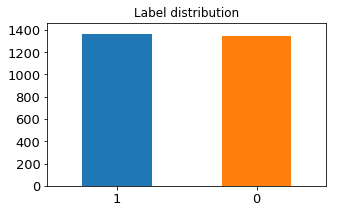

In [112]:
print(senti_label.label.value_counts())
# plot barchart for X_sample
upper_bound = max(senti_label.label.value_counts()) + 100
senti_label.label.value_counts().plot(kind = 'bar',
                                    title = 'Label distribution',
                                    ylim = [0, upper_bound],        
                                    rot = 0, fontsize = 13, figsize = (5,3))

1    508
0    492
Name: label, dtype: int64


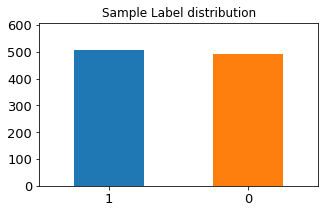

In [113]:
print(senti_label_sample.label.value_counts())
upper_bound = max(senti_label_sample.label.value_counts()) + 100
# plot barchart for X_sample
senti_label_sample.label.value_counts().plot(kind = 'bar',
                                           title = 'Sample Label distribution',
                                           ylim = [0, upper_bound], 
                                           rot = 0, fontsize = 13, figsize = (5,3))

__Combine two dataset into a BAR CHART__

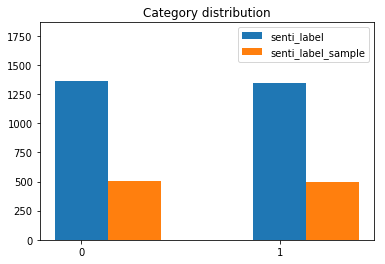

In [114]:
#Answer

size = 2 
x = np.arange(size) 
a = senti_label.label.value_counts()
b = senti_label_sample.label.value_counts() 
labels = [0,1]
total_width, n = 0.8, 3 
width = total_width / n 
x = x - (total_width - width) / 2 
ub = max(senti_label.label.value_counts()) + 500

plt.bar(x, a, width=width, label='senti_label',tick_label=labels) 
plt.bar(x + width, b, width=width, label='senti_label_sample') 
plt.title('Category distribution')
plt.legend(loc="upper right") 
plt.ylim(0,ub)
plt.show()

### 4.3 Feature Creation 
__(import nltk) word distribution and word frequency__

In [115]:
import nltk
senti_label['unigrams'] = senti_label['sentence'].apply(lambda x: dmh.tokenize_text(x))
senti_label[0:4]["unigrams"]

0                 [Good, case, ,, Excellent, value, .]
1                        [Great, for, the, jawbone, .]
2    [Tied, to, charger, for, conversations, lastin...
3                             [The, mic, is, great, .]
Name: unigrams, dtype: object

In [116]:
senti_label[-5:]

,sentence,label,provider,unigrams
2740,I think food should have flavor and texture an...,0,yelp,"[I, think, food, should, have, flavor, and, te..."
2741,Appetite instantly gone.,0,yelp,"[Appetite, instantly, gone, .]"
2742,Overall I was not impressed and would not go b...,0,yelp,"[Overall, I, was, not, impressed, and, would, ..."
2743,"The whole experience was underwhelming, and I ...",0,yelp,"[The, whole, experience, was, underwhelming, ,..."
2744,"Then, as if I hadn't wasted enough of my life ...",0,yelp,"[Then, ,, as, if, I, had, n't, wasted, enough,..."


In [117]:
list(senti_label[0:1]['unigrams'])

[['Good', 'case', ',', 'Excellent', 'value', '.']]

## 5 Scikit-learn

In [118]:
#generate matrix
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
senti_label_counts = count_vect.fit_transform(senti_label.sentence)
print (senti_label_counts)

  (0, 4855)	1
  (0, 1598)	1
  (0, 711)	1
  (0, 1988)	1
  (1, 2444)	1
  (1, 4525)	1
  (1, 1824)	1
  (1, 2018)	1
  (2, 3476)	1
  (2, 2748)	1
  (2, 2885)	1
  (2, 45)	1
  (2, 4520)	1
  (2, 2926)	1
  (2, 2562)	1
  (2, 1010)	1
  (2, 766)	1
  (2, 4603)	1
  (2, 4583)	1
  (2, 1824)	1
  (3, 2422)	1
  (3, 2863)	1
  (3, 4525)	1
  (3, 2018)	1
  (4, 4922)	1
  :	:
  (2710, 1383)	1
  (2710, 5104)	1
  (2710, 3431)	1
  (2710, 3851)	1
  (2710, 2063)	1
  (2710, 587)	1
  (2710, 4624)	1
  (2710, 783)	1
  (2710, 4539)	1
  (2710, 4542)	1
  (2710, 1535)	1
  (2710, 2625)	1
  (2710, 3161)	1
  (2710, 2309)	1
  (2710, 296)	1
  (2710, 4587)	1
  (2710, 2977)	1
  (2710, 4968)	1
  (2710, 645)	1
  (2710, 3092)	1
  (2710, 4536)	1
  (2710, 2277)	1
  (2710, 2427)	1
  (2710, 4603)	1
  (2710, 4525)	3


In [119]:
print (type (senti_label_counts))

<class 'scipy.sparse.csr.csr_matrix'>


In [120]:
analyze = count_vect.build_analyzer()
#analze用來切token (將首位變小寫 )
analyze("Hello World!")
#" ".join(list(X[4:5].text))

['hello', 'world']

In [121]:
analyze("".join(list (senti_label[:1].sentence)))

['good', 'case', 'excellent', 'value']

In [122]:
senti_label_counts.shape

(2711, 5149)

In [123]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
print (len(count_vect.get_feature_names()))
count_vect.get_feature_names()[:10]

5149


['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

In [124]:
senti_label[-10:]

,sentence,label,provider,unigrams
2735,The refried beans that came with my meal were ...,0,yelp,"[The, refried, beans, that, came, with, my, me..."
2736,Spend your money and time some place else.,0,yelp,"[Spend, your, money, and, time, some, place, e..."
2737,A lady at the table next to us found a live gr...,0,yelp,"[A, lady, at, the, table, next, to, us, found,..."
2738,the presentation of the food was awful.,0,yelp,"[the, presentation, of, the, food, was, awful, .]"
2739,I can't tell you how disappointed I was.,0,yelp,"[I, ca, n't, tell, you, how, disappointed, I, ..."
2740,I think food should have flavor and texture an...,0,yelp,"[I, think, food, should, have, flavor, and, te..."
2741,Appetite instantly gone.,0,yelp,"[Appetite, instantly, gone, .]"
2742,Overall I was not impressed and would not go b...,0,yelp,"[Overall, I, was, not, impressed, and, would, ..."
2743,"The whole experience was underwhelming, and I ...",0,yelp,"[The, whole, experience, was, underwhelming, ,..."
2744,"Then, as if I hadn't wasted enough of my life ...",0,yelp,"[Then, ,, as, if, I, had, n't, wasted, enough,..."


In [125]:
# we convert from sparse array to normal array
#取前五筆資料的一百項資料
#print(X_counts)
senti_label_counts[0:5,0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [126]:
# Answer here
senti_label_counts_list = senti_label_counts[4:5,:].toarray()[0].tolist()
#type(X_counts_list)
#senti_label_counts_list
for i in  range(len(senti_label_counts_list)):
    if senti_label_counts_list[i] == 1:
        print ("index: {0}\tvocabulary: {1}".format(i,count_vect.get_feature_names()[i]))
print ("\ntotal count: ",senti_label_counts_list.count(1))

index: 1168	vocabulary: decent
index: 2108	vocabulary: have
index: 2427	vocabulary: it
index: 2459	vocabulary: jiggle
index: 2643	vocabulary: line
index: 3381	vocabulary: plug
index: 3771	vocabulary: right
index: 4525	vocabulary: the
index: 4815	vocabulary: up
index: 4922	vocabulary: volume

total count:  10


In [127]:
count_vect.transform(['Something completely new.']).toarray()

array([[0, 0, 0, ..., 0, 0, 0]])

In [128]:
count_vect.transform(['00 Something completely new.']).toarray()

array([[1, 0, 0, ..., 0, 0, 0]])

In [129]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]

In [130]:
plot_x

['term_00',
 'term_10',
 'term_100',
 'term_11',
 'term_12',
 'term_13',
 'term_15',
 'term_15g',
 'term_15pm',
 'term_17',
 'term_18',
 'term_18th',
 'term_1928',
 'term_1947',
 'term_1948',
 'term_1949',
 'term_1971',
 'term_1973',
 'term_1979',
 'term_1980']

In [131]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(senti_label.index)[0:20]]

In [132]:
plot_y

['doc_0',
 'doc_1',
 'doc_2',
 'doc_3',
 'doc_4',
 'doc_5',
 'doc_6',
 'doc_7',
 'doc_8',
 'doc_9',
 'doc_10',
 'doc_11',
 'doc_12',
 'doc_13',
 'doc_14',
 'doc_15',
 'doc_16',
 'doc_18',
 'doc_19',
 'doc_20']

In [133]:
plot_z = senti_label_counts[0:20, 0:20].toarray()

In [134]:
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

### Using Seaborn

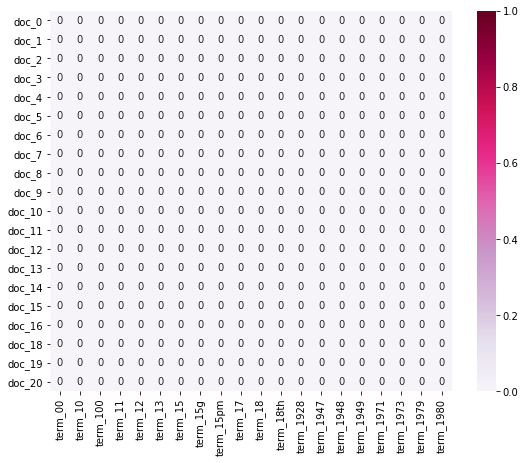

In [135]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### Dimensionality Reduction

In [136]:
from sklearn.decomposition import PCA

senti_label_reduced = PCA(n_components = 2).fit_transform(senti_label_counts.toarray())
senti_label_reduced.shape

(2711, 2)

In [137]:
labels

[0, 1]

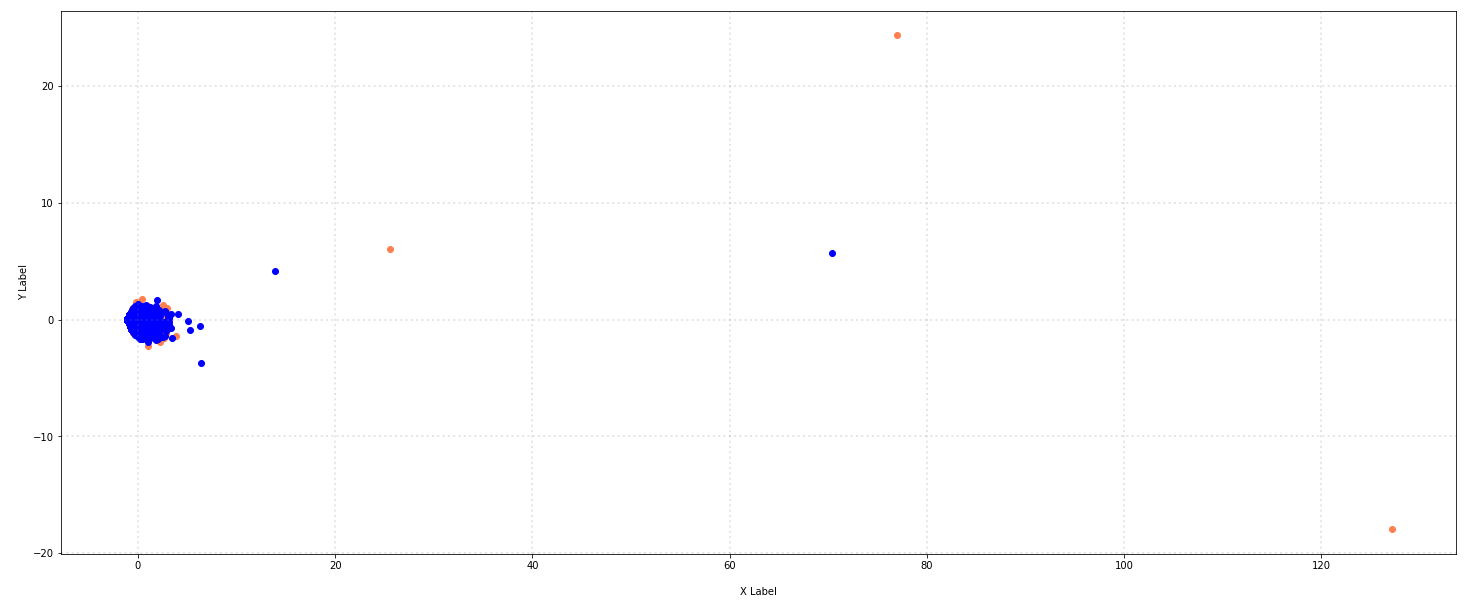

In [138]:
col = ['coral', 'blue']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, l in zip(col, labels):
    xs = senti_label_reduced[senti_label['label'] == l].T[0]
    ys = senti_label_reduced[senti_label['label'] == l].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

In [ ]:
X_reduced3 = PCA(n_components=3).fit_transform(X_counts.toarray())
X_reduced3.shape

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

for c, category in zip(col, categories):
    xs = X_reduced3[X['category_name'] == category].T[0]
    ys = X_reduced3[X['category_name'] == category].T[1]
    zs = X_reduced3[X['category_name'] == category].T[2]
   
    ax.scatter(xs, ys,zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
ax.view_init(10,15)
plt.show()